In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:\customer_data.csv")

# Keep only required columns
df = df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df = df.rename(columns={
    'CustomerID': 'Customer ID',
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
})

# Inspect dataset
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())



Shape: (200, 4)

Missing values:
 Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

First 5 rows:
    Customer ID  Age  Annual Income  Spending Score
0            1   19             15              39
1            2   21             15              81
2            3   20             16               6
3            4   23             16              77
4            5   31             17              40


In [11]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Select features (exclude Customer ID)
X = df[['Age', 'Annual Income', 'Spending Score']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Data (first 5 rows):\n", X_scaled[:5])


Scaled Data (first 5 rows):
 [[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


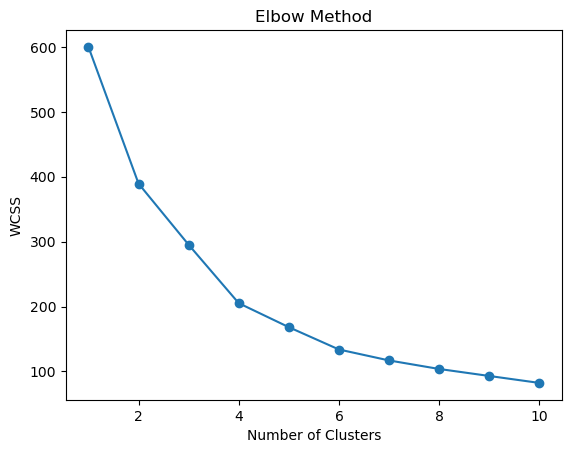

In [3]:
# Elbow Method (to find optimal clusters)

import os
os.environ["OMP_NUM_THREADS"] = "1"

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [4]:
# Apply KMeans Clustering
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans

# Fit KMeans with optimal clusters (use 5 as example)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df.head())


   Customer ID  Age  Annual Income  Spending Score  Cluster
0            1   19             15              39        1
1            2   21             15              81        1
2            3   20             16               6        0
3            4   23             16              77        1
4            5   31             17              40        1


In [5]:
# Silhouette Score
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", sil_score)


Silhouette Score: 0.41664341513732767


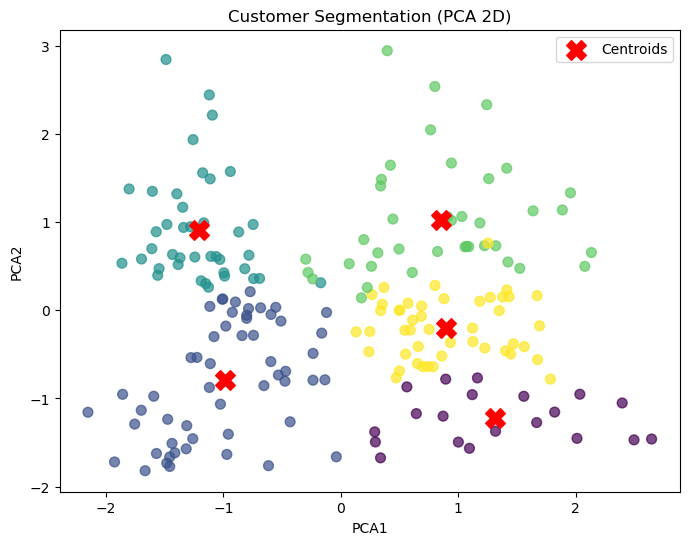

In [6]:
# PCA for 2D Visualization with Centroids
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:,0], X_pca[:,1]

plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0],
            pca.transform(kmeans.cluster_centers_)[:,1],
            c='red', s=200, marker='X', label='Centroids')
plt.title("Customer Segmentation (PCA 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


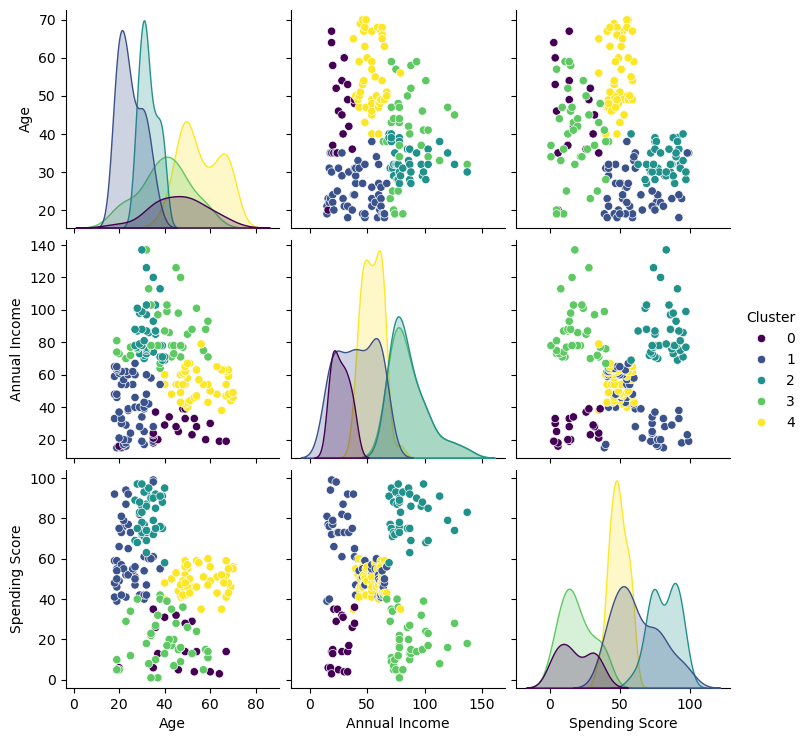

In [7]:
# Pairplot Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['Age','Annual Income','Spending Score','Cluster']], hue='Cluster', palette='viridis')
plt.show()


In [8]:
# Cluster Summary
import pandas as pd

cluster_summary = df.groupby('Cluster')[['Age','Annual Income','Spending Score']].mean()
print("\nCluster Summary:\n", cluster_summary)



Cluster Summary:
                Age  Annual Income  Spending Score
Cluster                                          
0        46.250000      26.750000       18.350000
1        25.185185      41.092593       62.240741
2        32.875000      86.100000       81.525000
3        39.871795      86.102564       19.358974
4        55.638298      54.382979       48.851064


In [9]:
# Recommendations

recommendations = []
for cluster_id, row in cluster_summary.iterrows():
    if row['Spending Score'] > 60 and row['Annual Income'] > cluster_summary['Annual Income'].mean():
        rec = f"Cluster {cluster_id}: High income & high spenders → target with premium products & loyalty programs."
    elif row['Spending Score'] > 60 and row['Annual Income'] <= cluster_summary['Annual Income'].mean():
        rec = f"Cluster {cluster_id}: Moderate income but high spenders → focus on discounts & retention strategies."
    elif row['Spending Score'] <= 40 and row['Annual Income'] > cluster_summary['Annual Income'].mean():
        rec = f"Cluster {cluster_id}: High income but low spenders → potential market, target with promotions & engagement."
    else:
        rec = f"Cluster {cluster_id}: Low income & low spenders → budget-friendly products & awareness campaigns."
    recommendations.append(rec)

print("\nRecommendations:")
for r in recommendations:
    print("-", r)



Recommendations:
- Cluster 0: Low income & low spenders → budget-friendly products & awareness campaigns.
- Cluster 1: Moderate income but high spenders → focus on discounts & retention strategies.
- Cluster 2: High income & high spenders → target with premium products & loyalty programs.
- Cluster 3: High income but low spenders → potential market, target with promotions & engagement.
- Cluster 4: Low income & low spenders → budget-friendly products & awareness campaigns.
